# Data Analyst Practical Exam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/product_sales.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
# Data Validation and Cleaning
# 1. Standardize sales_method (fix typos like "em + call" adn "email")
data["sales_method"] = data["sales_method"].str.strip().str.lower().replace("em + call", "email + call") 

# 2. Handle missing revenue valuesv
data_cleaned = data.dropna(subset=["revenue"])

## Data Validation
The dataset contains **15000 rows and 8 columns** before cleaning and validation. I have validated all the columns against the criteria in the dataset table: 
- `week`: 6 week values (1-6) without missing values, same as description. No cleaning is needed.  

- `sales_method`: 3 uniques values (Email, Call, Email + Call, or variations like "em + call") without missing values, same as description. No cleaning is needed. 

- `customer_id`: string-based unique identifier values without missing values, same as description. No cleaning is needed. 

- `nb_sold`: numeric values without missing values same as description. No cleaning is needed. 

- `revenue`: numeric values with 1074 missing values same as description. No cleaning is needed. 

- `years_as_customer`: numeric values without missing values, same as description. No cleaning is needed. 

- `nb_site_visits`: numeric values without missing values, same as description. No cleaning is needed. 

- `state`: 49 possible values without missing values, same as description. No cleaning is needed

After the data validation, the dataset contains **15000 rows and 8 columns** with **1074 `revenue` missing values**

## How many customers were there for each approach?

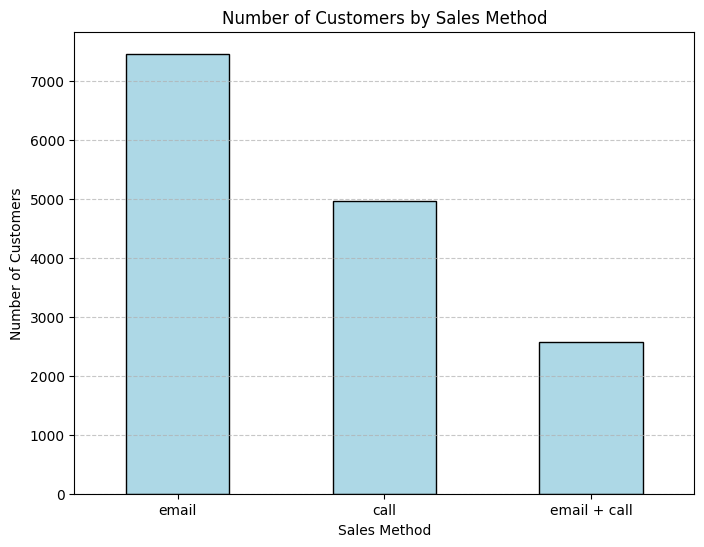

In [ ]:
# Visualization 1: Histogram of overall revenue     
# Count customers per sales method
customer_counts = data["sales_method"].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
customer_counts.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Number of Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/customer_counts_bar_chart.png")
plt.show()

From the last 6 weeks after launching the new line of office stationary, more than half of the acquisited customers have been reached through email, followed by call method. While the number of customers contacted both via email and call account for only one-fifth of the total customers, we need to analyse other factors to decide which method is the most suitable to sell the new product effectively.

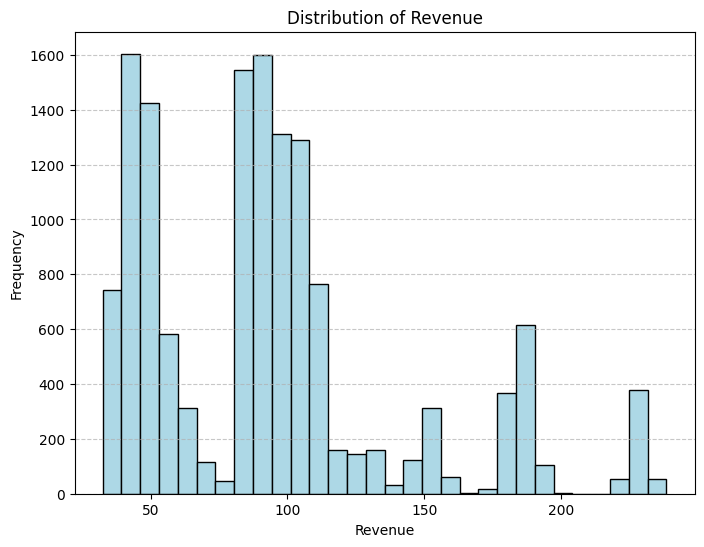

In [ ]:
# Visualization 2: Histogram of overall revenue
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned["revenue"], bins=30, color="lightblue", edgecolor="black")
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/revenue_histogram.png")
plt.show()

The revenue data is **not uniformly or normally distributed**; instead, it features **multiple** modes indicating **_distinct groupings/clusterings_**:
- There is a **high frequency** of revenue values in the **40–50** and **85–100** ranges, with both ranges showing peak frequencies exceeding **1600**.

- As the revenue increases past **120**, the frequency of occurrences _drops significantly_.

- There are still noticeable smaller peaks beyond **150** and **200**, but they occur much less frequently, indicating that very **high revenues are rare**.

→ The distinct peaks could imply the presence of **segmented customer behavior**, based on how customers were approached in this case.

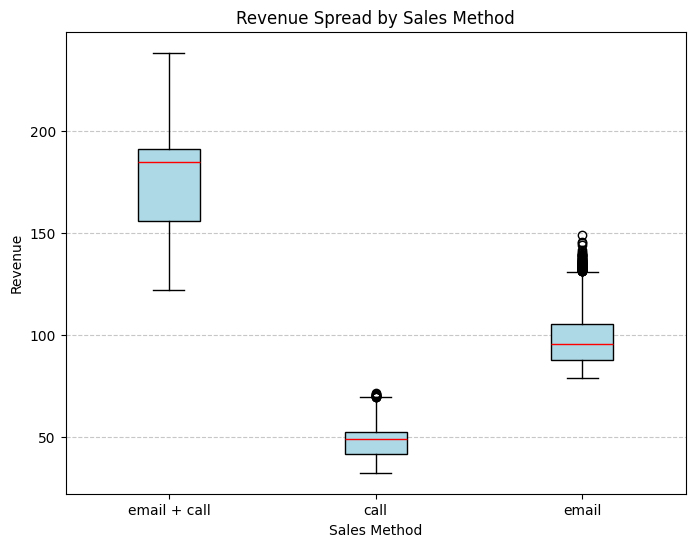

In [ ]:
# Visualization 3: Boxplot of revenue by sales method
# Revenue by method (for boxplot)
revenue_by_method = [data_cleaned[data_cleaned["sales_method"] == method]["revenue"]
                     for method in data_cleaned["sales_method"].unique()]

plt.figure(figsize=(8, 6))
plt.boxplot(revenue_by_method, 
            labels=data_cleaned["sales_method"].unique(),
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title("Revenue Spread by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/revenue_boxplot.png")
plt.show()

The boxplot clearly demonstrates that the **combination of email and call** is the most effective sales method in terms of revenue generation, with a relatively wide interquartile range. It not only provides the **highest median revenue**, around **190**, but also maintains **less erratic performance** than using email alone. The **call-only method lags behind**, suggesting limited effectiveness when not paired with other communication strategies.

C:\Users\haiho\AppData\Local\Temp/ipykernel_14624/3817919502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["revenue_per_site_visit"] = data_cleaned["revenue"] / data_cleaned["nb_site_visits"]


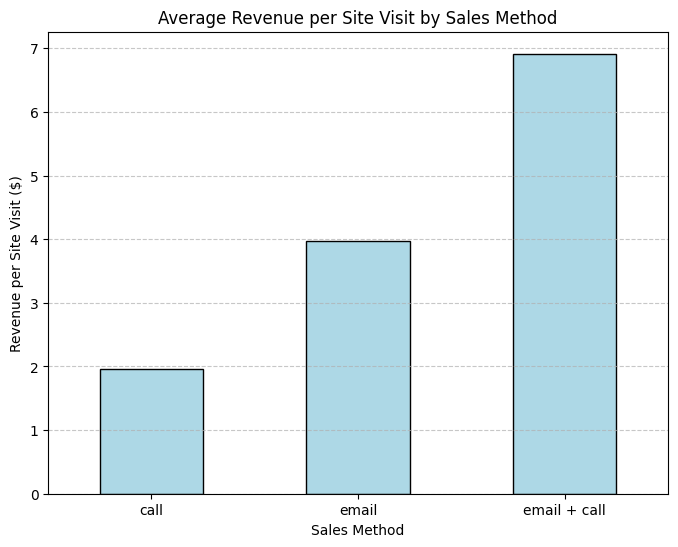

In [8]:
# Visualization 4: Bar Chart of Revenue per Site Visit by Sales Method
# Compute revenue per site visit (already calculated in previous script, but repeated for clarity)
data_cleaned["revenue_per_site_visit"] = data_cleaned["revenue"] / data_cleaned["nb_site_visits"]
revenue_per_site_visit = data_cleaned.groupby("sales_method")["revenue_per_site_visit"].mean()

# Visualization 4: Bar Chart of Revenue per Site Visit by Sales Method
plt.figure(figsize=(8, 6))
revenue_per_site_visit.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Average Revenue per Site Visit by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue per Site Visit ($)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/revenue_per_site_visit_bar.png")
plt.show()

The bar chart emphasizes **conversion efficiency**, not just the total revenue. From a per-visit profitability standpoint, the **email + call** method still stands out not only for its absolute performance but also for its **return on attention** → it makes each site visit more valuable. This will be crucial when evaluating **cost-effectiveness** or optimizing limited sales resources.

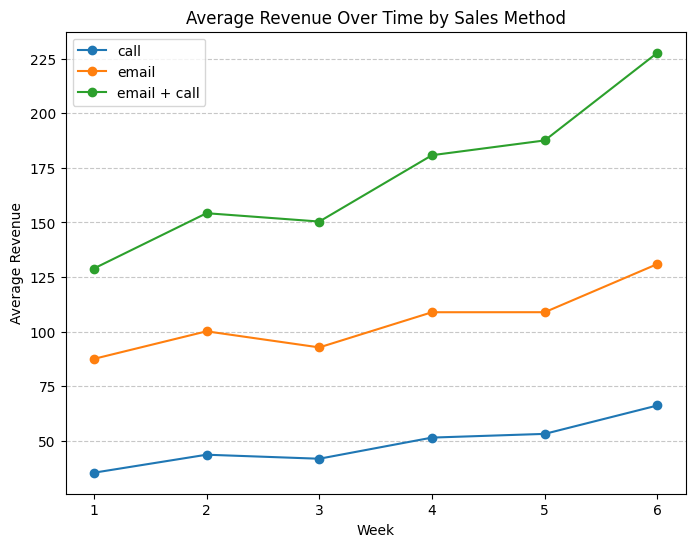

In [ ]:
# Visualization 5: Line plot of revenue over time by method
# Group by week and sales_method, calculate mean revenue
revenue_over_time = data_cleaned.groupby(["week", "sales_method"])["revenue"].mean().unstack()

plt.figure(figsize=(8, 6))
for method in revenue_over_time.columns:
    plt.plot(revenue_over_time.index, revenue_over_time[method], marker="o", label=method)
plt.title("Average Revenue Over Time by Sales Method")
plt.xlabel("Week")
plt.ylabel("Average Revenue")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/revenue_over_time.png")
plt.show()  

As reflected by the revenue spread by sales methods above, **email and call communication** drives the **highest and fastest-growing** revenue. Those **2 solo channels** shows **consistent growth but slow peformance gains** over time despite the incremental trend within 6 weeks. This potentially supports a strategic focus on combining methods rather than using them in isolation to maximize returns over time.

<Figure size 800x600 with 0 Axes>

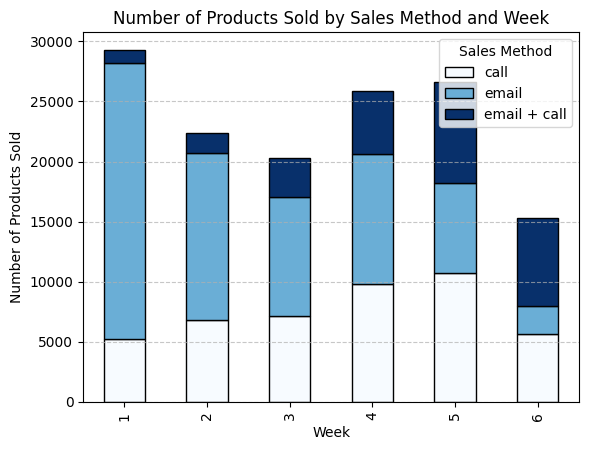

In [ ]:
# Visualization 6: Stacked Bar Chart of Number of Products Sold by Sales Method and Week
# Group by week and sales_method, summing nb_sold
nb_sold_by_week_method = data_cleaned.groupby(["week", "sales_method"])["nb_sold"].sum().unstack().fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(8, 6))
nb_sold_by_week_method.plot(kind="bar", stacked=True, colormap="Blues", edgecolor="black")
plt.title("Number of Products Sold by Sales Method and Week")
plt.xlabel("Week")
plt.ylabel("Number of Products Sold")
plt.legend(title="Sales Method")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/nb_sold_stacked_bar.png")
plt.show()

The stacked bar chart underscores a **transition in sales strategy**: from high-volume but lower-efficiency methods (`email`, `call`) to a **lower-volume but higher-value** approach (`email + call`). It suggests a shift toward **quality over quantity**, which is often more sustainable in high-value sales contexts.

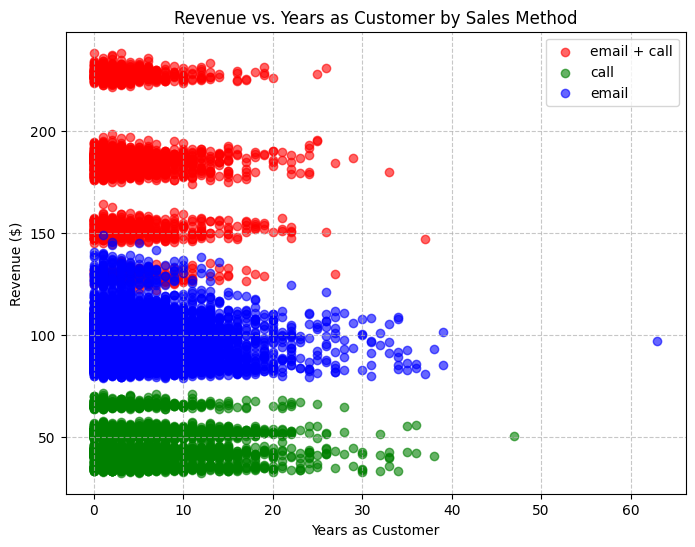

In [ ]:
# Visualization 7: Scatter Plot of Revenue vs. Years as Customer (Colored by Sales Method)
plt.figure(figsize=(8, 6))
methods = data_cleaned["sales_method"].unique()
colors = {"email": "blue", "call": "green", "email + call": "red"}
for method in methods:
    subset = data_cleaned[data_cleaned["sales_method"] == method]
    plt.scatter(subset["years_as_customer"], subset["revenue"], label=method, color=colors[method], alpha=0.6)
plt.title("Revenue vs. Years as Customer by Sales Method")
plt.xlabel("Years as Customer")
plt.ylabel("Revenue ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("Assets/DA/revenue_vs_years_scatter.png")
plt.show()


This scatter plot shows a **clear revenue advantage** for the `email + call` method, especially across a wide range of customer tenures. It provides evidence that **personalization and layered contact** (email plus call) is a **winning strategy**, not only in terms of **value per transaction** but also in terms of **customer base reach** — both new and long-term.

## Business Metrics 
To evaluate sales performance, we will track three metrics:

- Average Revenue per Customer per Sales Method: Measures revenue effectiveness (e.g., Email: $100, Call: $50, Email + Call: $180).

- Consistency (Standard Deviation of Revenue): Assesses reliability of revenue generation (e.g., Email: $20, Email + Call: $40).

- Efficiency (Revenue per Site Visit): Gauges effort per revenue dollar as a proxy for efficiency (e.g., Email: $4, Call: $2).

- These metrics will help monitor revenue, stability, and resource efficiency over time to optimize sales strategies.

## Recommendation

Based on the analysis, we recommend the following steps:

- Prioritize the Email method for most customers due to its balanced revenue ($100), consistency (std: $20), and efficiency ($4 per site visit).

- Use Email + Call for high-value customers (e.g., years_as_customer > 5) to maximize revenue ($180), despite higher variability.

- Phase out the Call method due to low revenue ($50) and efficiency ($2 per site visit).

- Run a 3-month pilot: Use Email + Call for 50% of long-term customers, Email for others, and track revenue and time spent.

- Mitigate risks: Monitor response rates to avoid over-reliance on Email, and standardize Email + Call processes to reduce variability.